# Machine Learning Project (academic year 2023-2024)

**Authors: Alessandro Pandolfi, Duccio Pagliai**

## Introduction and Imports

This project aims to build a several models using the Online Shoppers Purchasing Intention dataset. One of the objectives is to predict whether an online shopper has the intention to make a purchase or not.
The Online Shoppers Purchasing Intention dataset contains browsing behavior and purchase history of online shoppers. It consists of over 12,000 samples with both categorical and continuous variables. The dataset has been obtained from the UCI Machine Learning Repository and includes information on operating systems, regions, visitor status, visit duration, page visits, exit rates, and more.

First of all we imported several libraries and modules commonly used in data analysis, machine learning, and visualization that we shall use afterwards.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import time

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import silhouette_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import normalized_mutual_info_score

np.random.seed(0)

/home/morfeo/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../data/training_set_online_shoppers_intention.csv", index_col=0)

In [3]:
df_test = pd.read_csv("../data/test_set_online_shoppers_intention.csv", index_col=0)

## Preprocessing Training Set

First of all, we need to perform one-hot encoding on the non-binary categorical variables: `Month`, `OperatingSystems`, `Browser`, `Region`. `TrafficType` and `VisitorType`.

For every encoding performed we compute frequencies of the categories in question and then we manually eliminate rare categories from the dataset. This step avoids having too many features in the dataset, in this case very rare and mostly useless categories.

In [4]:
# hot-one encoding Month feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df[['Month']]).toarray())

encoded_df.columns = sorted(df.Month.unique())
encoded_df.index = df.index

# computing categorical frequencies
print(encoded_df.columns)
month_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(month_frequencies)

# selecting for categorical frequencies
#not needed

# merge with original df
df = df.join(encoded_df, how="inner")
# drop original Month feature
df = df.drop("Month", axis=1)

Index(['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'], dtype='object')
{'Aug': 330.0, 'Dec': 1281.0, 'Feb': 140.0, 'Jul': 318.0, 'June': 208.0, 'Mar': 1423.0, 'May': 2530.0, 'Nov': 2260.0, 'Oct': 407.0, 'Sep': 351.0}


In [5]:
# hot-one encoding OperatingSystems feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df[['OperatingSystems']]).toarray())

categories = sorted(df.OperatingSystems.unique())
encoded_df.columns = [f"OS{i}" for i in categories]
encoded_df.index = df.index

# computing categorical frequencies
print(encoded_df.columns)
OS_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(OS_frequencies)

# selecting for categorical frequencies
encoded_df = encoded_df.drop(encoded_df[encoded_df.OS5 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.OS6 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.OS7 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.OS8 == 1].index)
encoded_df = encoded_df.drop(['OS5', 'OS6', 'OS7', 'OS8'], axis=1)

# merge with original df
df = df.join(encoded_df, how="inner")
# drop original OperatingSystem feature
df = df.drop("OperatingSystems", axis=1)

Index(['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8'], dtype='object')
{'OS1': 1931.0, 'OS2': 4949.0, 'OS3': 1934.0, 'OS4': 355.0, 'OS5': 5.0, 'OS6': 17.0, 'OS7': 2.0, 'OS8': 55.0}


In [6]:
# hot-one encoding Browser feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df[['Browser']]).toarray())

# computing categorical frequencies
categories = sorted(df.Browser.unique())
encoded_df.columns = [f"Browser{i}" for i in categories]
encoded_df.index = df.index

# computing categorical frequencies
print(encoded_df.columns)
browser_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(browser_frequencies)

# selecting for categorical frequencies
encoded_df = encoded_df.drop(encoded_df[encoded_df.Browser7 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.Browser12 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.Browser13 == 1].index)
encoded_df = encoded_df.drop(['Browser7', 'Browser12', 'Browser13'], axis=1)

# merge with original df
df = df.join(encoded_df, how="inner")
# drop original Browser feature
df = df.drop("Browser", axis=1)

Index(['Browser1', 'Browser2', 'Browser3', 'Browser4', 'Browser5', 'Browser6',
       'Browser7', 'Browser8', 'Browser10', 'Browser12', 'Browser13'],
      dtype='object')
{'Browser1': 1820.0, 'Browser2': 5947.0, 'Browser3': 72.0, 'Browser4': 562.0, 'Browser5': 353.0, 'Browser6': 136.0, 'Browser7': 38.0, 'Browser8': 106.0, 'Browser10': 125.0, 'Browser12': 5.0, 'Browser13': 5.0}


In [7]:
# hot-one encoding Region feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df[['Region']]).toarray())

categories = sorted(df.Region.unique())
encoded_df.columns = [f"Region{i}" for i in categories]
encoded_df.index = df.index

# computing categorical frequencies
print(encoded_df.columns)
region_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(region_frequencies)

# selecting for categorical frequencies
#not needed

# merge with original df
df = df.join(encoded_df, how="inner")
# drop original Region feature
df = df.drop("Region", axis=1)

Index(['Region1', 'Region2', 'Region3', 'Region4', 'Region5', 'Region6',
       'Region7', 'Region8', 'Region9'],
      dtype='object')
{'Region1': 3558.0, 'Region2': 847.0, 'Region3': 1827.0, 'Region4': 873.0, 'Region5': 224.0, 'Region6': 579.0, 'Region7': 567.0, 'Region8': 316.0, 'Region9': 330.0}


In [8]:
# hot-one encoding TrafficType feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df[['TrafficType']]).toarray())

categories = sorted(df.TrafficType.unique())
encoded_df.columns = [f"TrafficType{i}" for i in categories]
encoded_df.index = df.index

# computing categorical frequencies
print(encoded_df.columns)
traffic_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(traffic_frequencies)

# selecting for categorical frequencies
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType7 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType9 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType12 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType14 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType15 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType16 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType17 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType18 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType19 == 1].index)
encoded_df = encoded_df.drop(['TrafficType7', 'TrafficType9', 'TrafficType12', 'TrafficType14', 'TrafficType15',
                             'TrafficType16', 'TrafficType17', 'TrafficType18', 'TrafficType19'], axis=1)

# merge with original df
df = df.join(encoded_df, how="inner")
# drop original TrafficType feature
df = df.drop("TrafficType", axis=1)

Index(['TrafficType1', 'TrafficType2', 'TrafficType3', 'TrafficType4',
       'TrafficType5', 'TrafficType6', 'TrafficType7', 'TrafficType8',
       'TrafficType9', 'TrafficType10', 'TrafficType11', 'TrafficType12',
       'TrafficType13', 'TrafficType14', 'TrafficType15', 'TrafficType16',
       'TrafficType17', 'TrafficType18', 'TrafficType19', 'TrafficType20'],
      dtype='object')
{'TrafficType1': 1830.0, 'TrafficType2': 2945.0, 'TrafficType3': 1491.0, 'TrafficType4': 799.0, 'TrafficType5': 206.0, 'TrafficType6': 317.0, 'TrafficType7': 28.0, 'TrafficType8': 253.0, 'TrafficType9': 31.0, 'TrafficType10': 333.0, 'TrafficType11': 173.0, 'TrafficType12': 1.0, 'TrafficType13': 557.0, 'TrafficType14': 8.0, 'TrafficType15': 25.0, 'TrafficType16': 2.0, 'TrafficType17': 1.0, 'TrafficType18': 6.0, 'TrafficType19': 12.0, 'TrafficType20': 103.0}


In [9]:
# hot-one encoding VisitorType feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df[['VisitorType']]).toarray())

categories = sorted(df.VisitorType.unique())
encoded_df.columns = [i for i in categories]
encoded_df.index = df.index

# computing categorical frequencies
print(encoded_df.columns)
visitor_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(visitor_frequencies)

# selecting for categorical frequencies
encoded_df = encoded_df.drop(encoded_df[encoded_df.Other == 1].index)
encoded_df = encoded_df.drop(['Other'], axis=1)

# merge with originale df
df = df.join(encoded_df, how="inner")
# drop original VisitorType feature
df = df.drop("VisitorType", axis=1)

Index(['New_Visitor', 'Other', 'Returning_Visitor'], dtype='object')
{'New_Visitor': 1258.0, 'Other': 29.0, 'Returning_Visitor': 7720.0}


## Descriptive Statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8978 entries, 3496 to 5064
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8978 non-null   int64  
 1   Administrative_Duration  8978 non-null   float64
 2   Informational            8978 non-null   int64  
 3   Informational_Duration   8978 non-null   float64
 4   ProductRelated           8978 non-null   int64  
 5   ProductRelated_Duration  8978 non-null   float64
 6   BounceRates              8978 non-null   float64
 7   ExitRates                6292 non-null   float64
 8   PageValues               8978 non-null   float64
 9   SpecialDay               8978 non-null   float64
 10  Weekend                  8978 non-null   bool   
 11  Revenue                  8978 non-null   bool   
 12  Aug                      8978 non-null   float64
 13  Dec                      8978 non-null   float64
 14  Feb                      8

As seen in the cell above, `ExitRate` is corrupted: one third of the observations of this variable are `NaN` values.

Below we can see an exploratory analysis of correlation in the training dataset.

<Axes: >

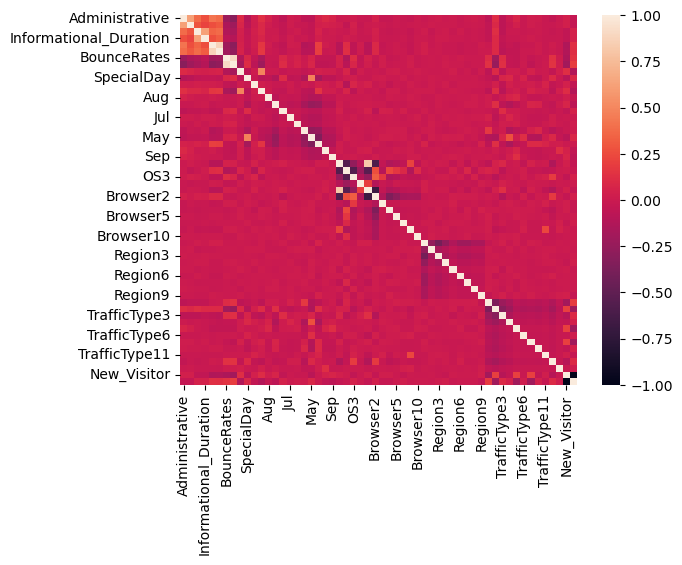

In [11]:
sns.heatmap(df.corr())

In [12]:
corr = df.corr()
corr.where(corr > 0.75, inplace=True)
corr.where(corr != 1, inplace=True)

for column in corr:
    for row in corr[column].index:
        if corr[column][row] > 0.75:
            print(column, row)
            # prints highly correlated feature pairs

ProductRelated ProductRelated_Duration
ProductRelated_Duration ProductRelated
BounceRates ExitRates
ExitRates BounceRates
OS1 Browser1
Browser1 OS1


As seen in the cell above, `BounceRates` is highly correlated with `ExitRates`, which is the feature of interest for our first task.

We can perform a preliminary feature selection of highly correlated features. Since `BounceRates` is highly correlated with `ExitRates`, our response variable, it mustn't be selected away. However the other two pairs do not involve the response variable, therefore we can select away one feature for every pair.

In [13]:
# preliminary feature selection of highly correlated features
df = df.drop(["ProductRelated_Duration", "Browser1"], axis=1)
df.head()

Administrative  Administrative_Duration  Informational  \
3496               0                 0.000000              0   
9415               5               158.700000              0   
9419               7                87.916667              1   
3837               1                 4.000000              0   
7305               2               132.400000              0   

      Informational_Duration  ProductRelated  BounceRates  ExitRates  \
3496                     0.0               5     0.000000   0.080000   
9415                     0.0              51     0.007692   0.011987   
9419                     0.0              46     0.004082   0.020544   
3837                     0.0              37     0.013889        NaN   
7305                     0.0              11     0.000000        NaN   

      PageValues  SpecialDay  Weekend  ...  TrafficType4  TrafficType5  \
3496    0.000000         0.6    False  ...           0.0           0.0   
9415    0.000000         0.0     True  ...           0.0           0.0   
9419    6.023523         0.0    False  ...           0.0           0.0   
3837    0.000000         0.8    False  ...           0.0           0.0   
7305    0.000000         0.0    False  ...           0.0           0.0   

      TrafficType6  TrafficType8  TrafficType10  TrafficType11  TrafficType13  \
3496           0.0           0.0            0.0            0.0            0.0   
9415           0.0           0.0            0.0            0.0            0.0   
9419           0.0           0.0            0.0            0.0            0.0   
3837           0.0           0.0            0.0            0.0            0.0   
7305           0.0           0.0            0.0            0.0            0.0   

      TrafficType20  New_Visitor  Returning_Visitor  
3496            0.0          0.0                1.0  
9415            0.0          0.0                1.0  
9419            0.0          0.0                1.0  
3837            0.0          0.0                1.0  
7305            0.0          1.0                0.0  

[5 rows x 54 columns]

In [14]:
numerical_and_response = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated",
                          "BounceRates", "ExitRates", "PageValues", "SpecialDay", "Revenue"]
#sns.pairplot(df[numerical_and_response], hue="Revenue", palette="rainbow")

## TASK 1 - Regression on ExitRates

As seen before, one third of the observations of `ExitRates` is corrupted.
Our objective is to recover from data loss:
- The lost observations *have to to be recovered/predicted*.
- The remaining observations will be our **training set**.

In [15]:
# dataset splitting 

# X matrix, where "ExitRates" is corrupted and needs recovering
X_recover = df[df["ExitRates"].isna()]
# X matrix, where "ExitRates" is NOT corrupted and will be used for prediction / recovering
X = df.dropna(subset=["ExitRates"])

# y vector, response vector
y = X[["ExitRates"]]

# response vector shouldn't be in the X matrix, predictor matrix
X = X.drop("ExitRates", axis=1)
X_recover = X_recover.drop("ExitRates", axis=1)

`Ridge` and `Lasso` might need scaled data, thus data is scaled using `StandardScaler`.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled.index = X.index

X_scaled

Administrative  Administrative_Duration  Informational  \
3496       -0.698267                -0.467597      -0.404432   
9415        0.817045                 0.464709      -0.404432   
9419        1.423170                 0.048882       0.392277   
8832       -0.092142                -0.332480      -0.404432   
3377       -0.395205                -0.438223       0.392277   
...              ...                      ...            ...   
2468        1.423170                 0.075808      -0.404432   
7878        2.332357                 0.299338       0.392277   
6568        3.544606                 1.064135       1.985695   
6989        1.423170                 0.175677      -0.404432   
5064       -0.698267                -0.467597      -0.404432   

      Informational_Duration  ProductRelated  BounceRates  PageValues  \
3496               -0.256852       -0.612054    -0.456546   -0.321494   
9415               -0.256852        0.431688    -0.293620   -0.321494   
9419               -0.256852        0.318238    -0.370095    0.013905   
8832               -0.256852        0.159407    -0.347928    0.825127   
3377                1.895396        0.068647    -0.456546    0.301688   
...                      ...             ...          ...         ...   
2468               -0.256852        0.363618    -0.456546    2.684642   
7878               -0.085852       -0.566674    -0.315343   -0.321494   
6568                1.117786        0.431688    -0.167196    0.142844   
6989               -0.256852       -0.158253    -0.456546   -0.321494   
5064               -0.256852        0.204787    -0.249908   -0.321494   

      SpecialDay   Weekend   Revenue  ...  TrafficType4  TrafficType5  \
3496    2.712875 -0.535942 -0.431336  ...      -0.30266     -0.158397   
9415   -0.309508  1.865873 -0.431336  ...      -0.30266     -0.158397   
9419   -0.309508 -0.535942 -0.431336  ...      -0.30266     -0.158397   
8832   -0.309508  1.865873  2.318377  ...      -0.30266     -0.158397   
3377    0.697953 -0.535942  2.318377  ...      -0.30266     -0.158397   
...          ...       ...       ...  ...           ...           ...   
2468   -0.309508 -0.535942 -0.431336  ...      -0.30266     -0.158397   
7878   -0.309508 -0.535942 -0.431336  ...      -0.30266      6.313251   
6568   -0.309508  1.865873  2.318377  ...      -0.30266     -0.158397   
6989   -0.309508 -0.535942 -0.431336  ...      -0.30266     -0.158397   
5064    2.712875 -0.535942 -0.431336  ...      -0.30266     -0.158397   

      TrafficType6  TrafficType8  TrafficType10  TrafficType11  TrafficType13  \
3496     -0.188546     -0.172101      -0.201286      -0.150302       -0.25139   
9415     -0.188546     -0.172101      -0.201286      -0.150302       -0.25139   
9419     -0.188546     -0.172101      -0.201286      -0.150302       -0.25139   
8832     -0.188546     -0.172101      -0.201286      -0.150302       -0.25139   
3377     -0.188546     -0.172101      -0.201286      -0.150302       -0.25139   
...            ...           ...            ...            ...            ...   
2468     -0.188546     -0.172101      -0.201286      -0.150302       -0.25139   
7878     -0.188546     -0.172101      -0.201286      -0.150302       -0.25139   
6568     -0.188546     -0.172101      -0.201286      -0.150302       -0.25139   
6989     -0.188546     -0.172101      -0.201286      -0.150302       -0.25139   
5064     -0.188546     -0.172101      -0.201286      -0.150302       -0.25139   

      TrafficType20  New_Visitor  Returning_Visitor  
3496       -0.10759    -0.403239           0.403239  
9415       -0.10759    -0.403239           0.403239  
9419       -0.10759    -0.403239           0.403239  
8832       -0.10759    -0.403239           0.403239  
3377       -0.10759    -0.403239           0.403239  
...             ...          ...                ...  
2468       -0.10759    -0.403239           0.403239  
7878       -0.10759     2.479919          -2.479919  
6568       -0.10759    -

### Ordinary Linear Regression

First of all, a feature selection procedure is needed since dataset dimensionality might be too high (15 columns).

The cell below performs Forward Stepwise Feature Selection. It takes a couple of minutes.

In [17]:
from sklearn.linear_model import LinearRegression

time_start = time.perf_counter()

selected_feature_combinations = []

for n in range(1, 7):                                 # number of features to select from 1 to 6
    # linear model
    model = LinearRegression(fit_intercept=True)
    
    # Forward Stepwise Feature Selection
    fsfs = SequentialFeatureSelector(model,
                                     n_features_to_select=n,
                                     direction="forward",
                                     scoring="r2",    # R^2 scoring function
                                     cv=10)           # 10-fold cross-validation
    fsfs.fit(X, y)
    
    # saving all features combinations selected by FSFS
    selected_feature_combinations.append(fsfs.get_feature_names_out())
    
time_elapsed = (time.perf_counter() - time_start)

In [18]:
time_elapsed/60

1.684305933733352

In [19]:
# saving results just in case

#selected_feature_combinations = [np.array(['BounceRates'], dtype=object),
#                                 np.array(['Administrative', 'BounceRates'], dtype=object),
#                                 np.array(['Administrative', 'ProductRelated', 'BounceRates'], dtype=object),
#                                 np.array(['Administrative', 'ProductRelated', 'BounceRates', 'New_Visitor'], dtype=object),
#                                 np.array(['Administrative', 'ProductRelated', 'BounceRates', 'PageValues', 'New_Visitor'], dtype=object),
#                                 np.array(['Administrative', 'ProductRelated', 'BounceRates', 'PageValues', 'TrafficType2', 'New_Visitor'],
#                                          dtype=object)]

Since `SequentialFeatureSelector` has no way to return the computed cross-validated scores, cross-validation has to be done a second time. Thankfully, it's not very computationally expensive in our case.

In [20]:
# validating feature selection
from sklearn.linear_model import LinearRegression

n_selected = []
cv_scores = []

for feature_vector in selected_feature_combinations:
    # linear model
    model = LinearRegression(fit_intercept=True)
    scores = cross_val_score(model, 
                             X[ feature_vector ], 
                             y,
                             scoring="r2", # R^2 scoring function
                             cv=10)        # 10-fold cross-validation
    n_selected += [len(feature_vector) for _ in range(10)]
    cv_scores += list(scores)

[Text(0.5, 0, 'Number of Selected Variables by FSFS'),
 Text(0, 0.5, 'Cross Validated R2')]

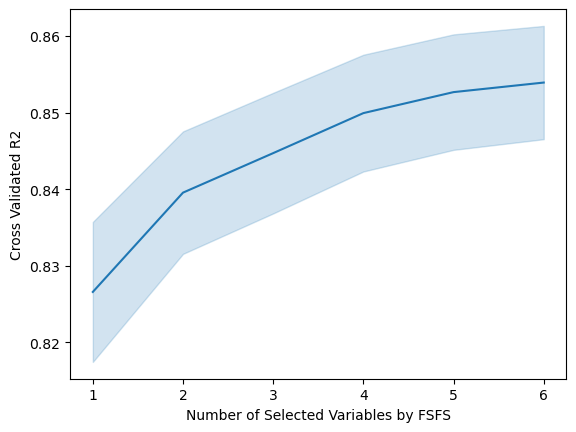

In [21]:
cv_df = pd.DataFrame({"n":n_selected, "cv":cv_scores})

ax = sns.lineplot(data=cv_df, x="n", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='Number of Selected Variables by FSFS', ylabel='Cross Validated R2')

From the plot above, an educated guess could be made: 4 is a sufficient number of predictors, more predictors would risk overfitting.

In [22]:
olr_best_features = selected_feature_combinations[3]
olr_best_features

array(['Administrative', 'ProductRelated', 'BounceRates', 'New_Visitor'],
      dtype=object)

### Ridge Regression

In [23]:
# tuning hyperparameter alpha
from sklearn.linear_model import Ridge

alphas = [0, 1e-3, 1e-1, 1, 1000, 10000]
alpha_col = []
cv_scores = []

for a in alphas:
    # linear model
    model = Ridge(alpha=a, # hyperparameter to tune
                  fit_intercept=True)
    scores = cross_val_score(model, 
                             X_scaled, 
                             y,
                             scoring="r2", # R^2 scoring function
                             cv=10) #      # 10-fold cross-validation
    alpha_col += [a for _ in range(10)]
    cv_scores += list(scores)

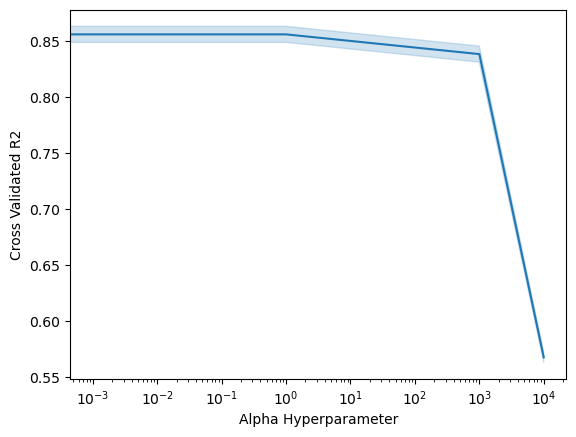

In [24]:
tuning_df = pd.DataFrame({"alpha":alpha_col, "cv":cv_scores})

ax = sns.lineplot(data=tuning_df, x="alpha", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='Alpha Hyperparameter', ylabel='Cross Validated R2')
plt.xscale('log')

It would seem that the best alpha is practically zero. Recall that if alpha=0 the model is just a linear model without penalization.

### Lasso Regression

In [25]:
# tuning hyperparameter alpha
from sklearn.linear_model import Lasso

alphas = [1e-6, 1e-3, 1e-2, 1e-1]
alpha_col = []
cv_scores = []

for a in alphas:
    # linear model
    model = Lasso(alpha=a, # hyperparameter to tune
                  fit_intercept=True,
                  max_iter=3000)
    scores = cross_val_score(model, 
                             X_scaled, 
                             y,
                             scoring="r2", # R^2 scoring function
                             cv=10)        # 10-fold cross-validation
    alpha_col += [a for _ in range(10)]
    cv_scores += list(scores)

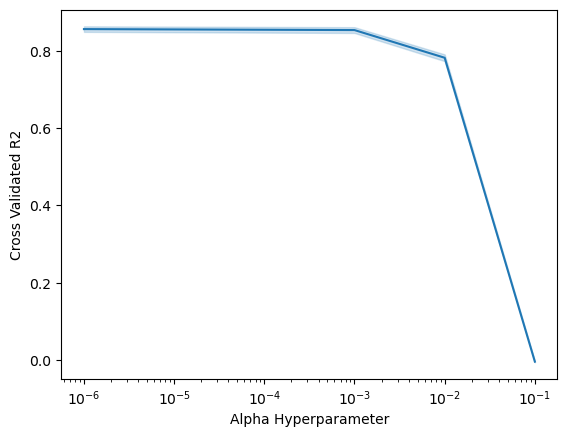

In [26]:
tuning_df = pd.DataFrame({"alpha":alpha_col, "cv":cv_scores})

ax = sns.lineplot(data=tuning_df, x="alpha", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='Alpha Hyperparameter', ylabel='Cross Validated R2')
plt.xscale('log')

It would seem again that the best alpha is practically zero. Recall that if alpha=0 the model is just a linear model without penalization.

### KNN Regression

K Neighrest Neighbors regression is going to be the only **non-parametric** model used in the first task.

In [27]:
# tuning hyperparameter K
from sklearn.neighbors import KNeighborsRegressor

Ks = [1, 5, 10, 20, 30, 50, 100]
K_col = []
cv_scores = []

for K in Ks:
    # non-parametric model
    model = KNeighborsRegressor(n_neighbors=K) # hyperparameter to tune
    scores = cross_val_score(model, 
                             X_scaled, 
                             y,
                             scoring="r2", # R^2 scoring function
                             cv=10)        # 10-fold cross-validation
    K_col += [K for _ in range(10)]
    cv_scores += list(scores)

[Text(0.5, 0, 'K Hyperparameter'), Text(0, 0.5, 'Cross Validated R2')]

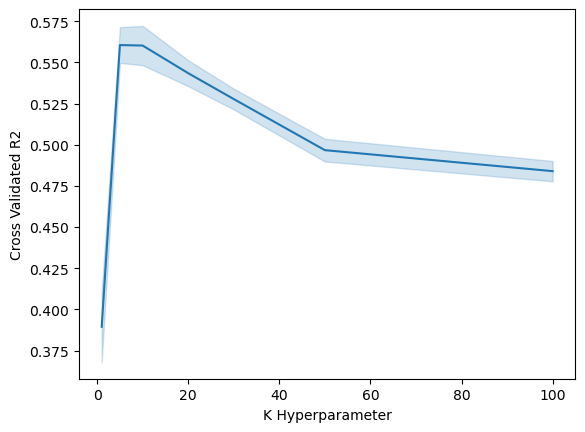

In [28]:
tuning_df = pd.DataFrame({"K":K_col, "cv":cv_scores})

ax = sns.lineplot(data=tuning_df, x="K", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='K Hyperparameter', ylabel='Cross Validated R2')

Best range of K is 5-10. K=5 is selected as temporary K for feature selection.

In [29]:
from sklearn.neighbors import KNeighborsRegressor

time_start = time.perf_counter()

selected_feature_combinations = []

for n in range(1, 8):                              # number of features to select from 1 to 7
    model = KNeighborsRegressor(n_neighbors=5)     # tuned hyperparamter
    fsfs = SequentialFeatureSelector(model,
                                     n_features_to_select=n,
                                     direction="forward",
                                     scoring="r2", # R^2 scoring function
                                     cv=10)        # 10-fold cross-validation
    fsfs.fit(X_scaled, y)
    # saving all feature combinations selected by FFS
    selected_feature_combinations.append(fsfs.get_feature_names_out())

time_elapsed = (time.perf_counter() - time_start)

In [30]:
time_elapsed/60

6.170608336133318

In [31]:
# saving feature selection results just in case

#selected_feature_combinations = [np.array(['BounceRates'], dtype=object),
#                                 np.array(['ProductRelated', 'BounceRates'], dtype=object),
#                                 np.array(['Administrative_Duration', 'ProductRelated', 'BounceRates'], dtype=object),
#                                 np.array(['Administrative_Duration', 'ProductRelated', 'BounceRates', 'Returning_Visitor'], dtype=object),
#                                 np.array(['Administrative_Duration', 'ProductRelated', 'BounceRates', 'Revenue', 'Returning_Visitor'],
#                                          dtype=object),
#                                 np.array(['Administrative_Duration', 'ProductRelated', 'BounceRates', 'Revenue', 'OS3',
#                                           'Returning_Visitor'], dtype=object),
#                                 np.array(['Administrative_Duration', 'ProductRelated', 'BounceRates', 'Revenue', 'OS3', 'New_Visitor',
#                                           'Returning_Visitor'], dtype=object)]

In [32]:
# validating feature selection
from sklearn.neighbors import KNeighborsRegressor

n_selected = []
cv_scores = []

for feature_vector in selected_feature_combinations:
    # non-parametric model
    model = KNeighborsRegressor(n_neighbors=5) # tuned hyperparamter
    scores = cross_val_score(model,
                             X_scaled[feature_vector],
                             y,
                             scoring="r2",     # R^2 scoring function
                             cv=10)            # 10-fold cross-validation
    n_selected += [len(feature_vector) for _ in range(10)]
    cv_scores += list(scores)

[Text(0.5, 0, 'Number of Selected Features by FFS'),
 Text(0, 0.5, 'Cross Validated R2')]

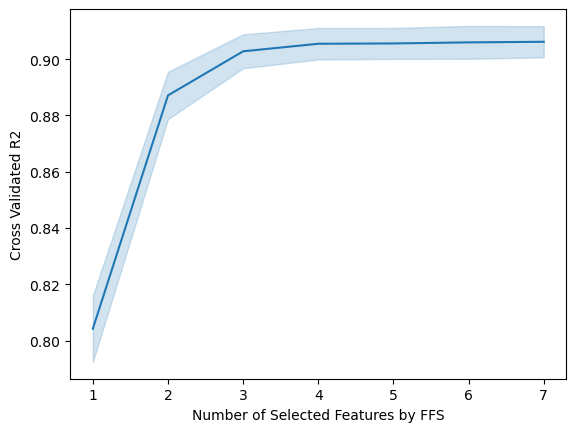

In [33]:
cv_df = pd.DataFrame({"n": n_selected, "cv": cv_scores})

ax = sns.lineplot(data=cv_df, x="n", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='Number of Selected Features by FFS', ylabel='Cross Validated R2')

In [34]:
knn_best_features = selected_feature_combinations[2]
knn_best_features

array(['Administrative_Duration', 'ProductRelated', 'BounceRates'],
      dtype=object)

### Recovering ExitRates on Training Set

After fitting three different linear models (OLR, Ridge, Lasso) and assessing that their prediction performance is quite similar, a final decision has to be made.

Stepwise feature Selection applied on OLR has returned excellent results and reduced dimensionality in a way that Lasso Regression could not. KNN Regression also returned good results, therefore we have to compare these two models.

In [35]:
# model validation and comparison
model = LinearRegression(fit_intercept=True)
scores = cross_val_score(model, 
                         X[olr_best_features], 
                         y,
                         scoring="r2", # R^2 scoring function
                         cv=10)        # 10-fold cross-validation
np.mean(scores)

0.8499439453813895

In [36]:
# model validation and comparison
model = KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(model, 
                         X[knn_best_features], 
                         y,
                         scoring="r2", # R^2 scoring function
                         cv=10)        # 10-fold cross-validation
np.mean(scores)

0.8447433441787057

It's clear that the Ordinary Linear Regression performs marginally better, making it our model of choice.

In [37]:
# recovery of lost data using the OLR model
model = LinearRegression(fit_intercept=True)
model.fit(X[olr_best_features], y)
y_recover = model.predict(X_recover[olr_best_features])

`ExitRates` should not exceed the range [0-1]. Corrections should take place, 22 in total.

In [38]:
# saving indexes of values lower than 0, to correct
lower_than_zero = np.where(y_recover<0)[0]
# printing frequency of indexes of values lower than 0
print(len(lower_than_zero))
# making corrections
y_recover[lower_than_zero] = 0

22


In [39]:
# checking that corrections took place and that the range [0-1] is respected
print(min(y_recover), max(y_recover) )

[0.] [0.20506638]


In [40]:
# merging recovered data with original df
df_recovered = pd.merge(X, y, left_index=True, right_index=True)
X_recover["ExitRates"] = y_recover
df_recovered = pd.concat([df_recovered, X_recover])
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8978 entries, 3496 to 7640
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8978 non-null   int64  
 1   Administrative_Duration  8978 non-null   float64
 2   Informational            8978 non-null   int64  
 3   Informational_Duration   8978 non-null   float64
 4   ProductRelated           8978 non-null   int64  
 5   BounceRates              8978 non-null   float64
 6   PageValues               8978 non-null   float64
 7   SpecialDay               8978 non-null   float64
 8   Weekend                  8978 non-null   bool   
 9   Revenue                  8978 non-null   bool   
 10  Aug                      8978 non-null   float64
 11  Dec                      8978 non-null   float64
 12  Feb                      8978 non-null   float64
 13  Jul                      8978 non-null   float64
 14  June                     8

### Preprocessing Testing Set

In [41]:
# hot-one encoding VisitorType feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df_test[['VisitorType']]).toarray())

categories = sorted(df_test.VisitorType.unique())
encoded_df.columns = [i for i in categories]
encoded_df.index = df_test.index

# computing categorical frequencies
print(encoded_df.columns)
visitor_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(visitor_frequencies)

# selecting for categorical frequencies
encoded_df = encoded_df.drop(encoded_df[encoded_df.Other == 1].index)
encoded_df = encoded_df.drop(['Other'], axis=1)

# merge with originale df
df_test = df_test.join(encoded_df, how="inner")
# drop original VisitorType feature
df_test = df_test.drop("VisitorType", axis=1)

Index(['New_Visitor', 'Other', 'Returning_Visitor'], dtype='object')
{'New_Visitor': 405.0, 'Other': 19.0, 'Returning_Visitor': 2658.0}


In [42]:
# hot-one encoding Month feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df_test[['Month']]).toarray())

encoded_df.columns = sorted(df_test.Month.unique())
encoded_df.index = df_test.index

# computing categorical frequencies
print(encoded_df.columns)
month_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(month_frequencies)

# selecting for categorical frequencies
#not needed

# merge with original df
df_test = df_test.join(encoded_df, how="inner")
# drop original Month feature
df_test = df_test.drop("Month", axis=1)

Index(['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'], dtype='object')
{'Aug': 103.0, 'Dec': 428.0, 'Feb': 44.0, 'Jul': 114.0, 'June': 80.0, 'Mar': 484.0, 'May': 834.0, 'Nov': 737.0, 'Oct': 142.0, 'Sep': 97.0}


In [43]:
# hot-one encoding OperatingSystems feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df_test[['OperatingSystems']]).toarray())

categories = sorted(df_test.OperatingSystems.unique())
encoded_df.columns = [f"OS{i}" for i in categories]
encoded_df.index = df_test.index

# computing categorical frequencies
print(encoded_df.columns)
OS_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(OS_frequencies)

# selecting for categorical frequencies
encoded_df = encoded_df.drop(encoded_df[encoded_df.OS5 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.OS6 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.OS7 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.OS8 == 1].index)
encoded_df = encoded_df.drop(['OS5', 'OS6', 'OS7', 'OS8'], axis=1)

# merge with original df
df_test = df_test.join(encoded_df, how="inner")
# drop original OperatingSystem feature
df_test = df_test.drop("OperatingSystems", axis=1)

Index(['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8'], dtype='object')
{'OS1': 654.0, 'OS2': 1651.0, 'OS3': 620.0, 'OS4': 123.0, 'OS5': 1.0, 'OS6': 2.0, 'OS7': 5.0, 'OS8': 7.0}


In [44]:
# hot-one encoding Browser feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df_test[['Browser']]).toarray())

# computing categorical frequencies
categories = sorted(df_test.Browser.unique())
encoded_df.columns = [f"Browser{i}" for i in categories]
encoded_df.index = df_test.index

# computing categorical frequencies
print(encoded_df.columns)
browser_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(browser_frequencies)

# selecting for categorical frequencies
encoded_df = encoded_df.drop(encoded_df[encoded_df.Browser7 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.Browser12 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.Browser13 == 1].index)
encoded_df = encoded_df.drop(['Browser7', 'Browser12', 'Browser13'], axis=1)

# merge with original df
df_test = df_test.join(encoded_df, how="inner")
# drop original Browser feature
df_test = df_test.drop("Browser", axis=1)

Index(['Browser1', 'Browser2', 'Browser3', 'Browser4', 'Browser5', 'Browser6',
       'Browser7', 'Browser8', 'Browser9', 'Browser10', 'Browser12',
       'Browser13'],
      dtype='object')
{'Browser1': 629.0, 'Browser2': 1980.0, 'Browser3': 33.0, 'Browser4': 174.0, 'Browser5': 109.0, 'Browser6': 37.0, 'Browser7': 10.0, 'Browser8': 29.0, 'Browser9': 1.0, 'Browser10': 38.0, 'Browser12': 5.0, 'Browser13': 3.0}


In [45]:
# hot-one encoding Region feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df_test[['Region']]).toarray())

categories = sorted(df_test.Region.unique())
encoded_df.columns = [f"Region{i}" for i in categories]
encoded_df.index = df_test.index

# computing categorical frequencies
print(encoded_df.columns)
region_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(region_frequencies)

# selecting for categorical frequencies
#not needed

# merge with original df
df_test = df_test.join(encoded_df, how="inner")
# drop original Region feature
df_test = df_test.drop("Region", axis=1)

Index(['Region1', 'Region2', 'Region3', 'Region4', 'Region5', 'Region6',
       'Region7', 'Region8', 'Region9'],
      dtype='object')
{'Region1': 1190.0, 'Region2': 274.0, 'Region3': 551.0, 'Region4': 294.0, 'Region5': 92.0, 'Region6': 222.0, 'Region7': 184.0, 'Region8': 113.0, 'Region9': 110.0}


In [46]:
# hot-one encoding TrafficType feature
encoder = OneHotEncoder(categories="auto")
encoded_df = pd.DataFrame(encoder.fit_transform(df_test[['TrafficType']]).toarray())

categories = sorted(df_test.TrafficType.unique())
encoded_df.columns = [f"TrafficType{i}" for i in categories]
encoded_df.index = df_test.index

# computing categorical frequencies
print(encoded_df.columns)
traffic_frequencies = {col : encoded_df[[col]].sum()[0] for col in encoded_df.columns}
print(traffic_frequencies)

# selecting for categorical frequencies
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType7 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType9 == 1].index)
#encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType12 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType14 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType15 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType16 == 1].index)
#encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType17 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType18 == 1].index)
encoded_df = encoded_df.drop(encoded_df[encoded_df.TrafficType19 == 1].index)
encoded_df = encoded_df.drop(['TrafficType7', 'TrafficType9', 'TrafficType14', 'TrafficType15',
                             'TrafficType16', 'TrafficType18', 'TrafficType19'], axis=1)

# merge with original df
df_test = df_test.join(encoded_df, how="inner")
# drop original TrafficType feature
df_test = df_test.drop("TrafficType", axis=1)

Index(['TrafficType1', 'TrafficType2', 'TrafficType3', 'TrafficType4',
       'TrafficType5', 'TrafficType6', 'TrafficType7', 'TrafficType8',
       'TrafficType9', 'TrafficType10', 'TrafficType11', 'TrafficType13',
       'TrafficType14', 'TrafficType15', 'TrafficType16', 'TrafficType18',
       'TrafficType19', 'TrafficType20'],
      dtype='object')
{'TrafficType1': 596.0, 'TrafficType2': 929.0, 'TrafficType3': 538.0, 'TrafficType4': 263.0, 'TrafficType5': 49.0, 'TrafficType6': 123.0, 'TrafficType7': 12.0, 'TrafficType8': 86.0, 'TrafficType9': 11.0, 'TrafficType10': 114.0, 'TrafficType11': 70.0, 'TrafficType13': 180.0, 'TrafficType14': 4.0, 'TrafficType15': 12.0, 'TrafficType16': 1.0, 'TrafficType18': 4.0, 'TrafficType19': 5.0, 'TrafficType20': 33.0}


In [47]:
corr = df_test.corr()
corr.where(corr > 0.75, inplace=True)
corr.where(corr != 1, inplace=True)

for column in corr:
    for row in corr[column].index:
        if corr[column][row] > 0.75:
            # printing highly correlated feature pairs
            print(column, row)

ProductRelated ProductRelated_Duration
ProductRelated_Duration ProductRelated
BounceRates ExitRates
ExitRates BounceRates
OS1 Browser1
Browser1 OS1


In [48]:
# preliminary feature selection of highly correlated features
df_test = df_test.drop(["ProductRelated_Duration", "Browser1"], axis=1)
df_test.head()

Administrative  Administrative_Duration  Informational  \
0                0                      0.0              0   
3                0                      0.0              0   
5                0                      0.0              0   
12               0                      0.0              0   
14               0                      0.0              0   

    Informational_Duration  ProductRelated  BounceRates  ExitRates  \
0                      0.0               1     0.200000        NaN   
3                      0.0               2     0.050000        NaN   
5                      0.0              19     0.015789   0.024561   
12                     0.0               7     0.000000   0.028571   
14                     0.0               2     0.000000        NaN   

    PageValues  SpecialDay  Weekend  ...  TrafficType2  TrafficType3  \
0          0.0         0.0    False  ...           0.0           0.0   
3          0.0         0.0    False  ...           0.0           0.0   
5          0.0         0.0    False  ...           0.0           1.0   
12         0.0         0.0    False  ...           0.0           1.0   
14         0.0         0.0    False  ...           0.0           1.0   

    TrafficType4  TrafficType5  TrafficType6  TrafficType8  TrafficType10  \
0            0.0           0.0           0.0           0.0            0.0   
3            1.0           0.0           0.0           0.0            0.0   
5            0.0           0.0           0.0           0.0            0.0   
12           0.0           0.0           0.0           0.0            0.0   
14           0.0           0.0           0.0           0.0            0.0   

    TrafficType11  TrafficType13  TrafficType20  
0             0.0            0.0            0.0  
3             0.0            0.0            0.0  
5             0.0            0.0            0.0  
12            0.0            0.0            0.0  
14            0.0            0.0            0.0  

[5 rows x 55 columns]

In [49]:
# checking if training set and testing set have the same features even after encoding and preliminary selection
for col in df_test.columns:
    if col not in df_recovered.columns:
        print(col)

Browser9


In [50]:
# frequency of Browser = 9 in test set
sum(df_test.Browser9)

1.0

We checked if the columns of the two datasets are the same: they're not. Category `Browser9` was so rare that it was only present in the testing set (frequency = 1).

Since we need the same columns in the two datasets, we choose drop the categorical variable `Browser9` from the test set too.

In [51]:
df_test = df_test.drop(["Browser9"], axis=1)

In [52]:
# checking if training set and testing set have the same features
for col in df_test.columns:
    if col not in df_recovered.columns:
        print(col)

### Recovering ExitRates on Testing Set

In [53]:
# dataset splitting
# X matrix, predictor matrix
X_test = df_test

# X matrix, where "ExitRates" is corrupted and needs recovering
X_test_recover = X_test[X_test.isna().any(axis=1)]
# X matrix, where "ExitRates" is NOT corrupted and will be used for prediction / recovering
X_test = X_test.dropna() 

# y vector, response vector
y_test = X_test[["ExitRates"]]

# response vector shouldn't be in the X matrix, predictor matrix
X_test = X_test.drop("ExitRates", axis=1) 
X_test_recover = X_test_recover.drop("ExitRates", axis=1)

In [54]:
# fitting model using training data, as seen above
model = LinearRegression(fit_intercept=True)
model.fit(X[olr_best_features], y)

# making predictions
y_pred = model.predict(X_test[olr_best_features])

# computing test-R2 score
r2_score(y_test, y_pred)

0.8422900719352167

In [55]:
# recovery of lost data using a linear model
y_test_recover = model.predict(X_test_recover[olr_best_features])

# merging recovered data with original df
df_test = pd.merge(X_test, y_test, left_index=True, right_index=True)
X_test_recover["ExitRates"] = y_test_recover
df_test = pd.concat([df_test, X_test_recover])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2981 entries, 5 to 12297
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           2981 non-null   int64  
 1   Administrative_Duration  2981 non-null   float64
 2   Informational            2981 non-null   int64  
 3   Informational_Duration   2981 non-null   float64
 4   ProductRelated           2981 non-null   int64  
 5   BounceRates              2981 non-null   float64
 6   PageValues               2981 non-null   float64
 7   SpecialDay               2981 non-null   float64
 8   Weekend                  2981 non-null   bool   
 9   Revenue                  2981 non-null   bool   
 10  New_Visitor              2981 non-null   float64
 11  Returning_Visitor        2981 non-null   float64
 12  Aug                      2981 non-null   float64
 13  Dec                      2981 non-null   float64
 14  Feb                      298

In [56]:
# saving recovered data to csv just in case
#df_recovered.to_csv("../data/recovered_training_set_online_shoppers_intention.csv")
#df_test.to_csv("../data/recovered_test_set_online_shoppers_intention.csv")

## TASK 2 - Classification on Revenue

Before training models, preliminary adjustments to the datasets are in order.

Regarding colinearity in the dataset, we have already seen very high correlation between `BounceRates` and `ExitRates` pre-recovery. Only now it might be a problem. Therefore we select away `BounceRates`, being less important for our tasks.

In [57]:
corr = df_recovered.corr()
corr.where(corr > 0.75, inplace=True)
corr.where(corr != 1, inplace=True)

for column in corr:
    for row in corr[column].index:
        if corr[column][row] > 0.75:
            print(column, row)
            # prints highly correlated feature pairs

BounceRates ExitRates
ExitRates BounceRates


Columns have to be sorted because `sklearn` models require the `X` parameter to have the same column names in the same order.

In [58]:
# initial feature selection of highly correlated features
df_recovered = df_recovered.drop(["BounceRates"], axis=1)
# sorting column index
df_recovered = df_recovered.sort_index(axis=1)
df_recovered.head()

Administrative  Administrative_Duration  Aug  Browser10  Browser2  \
3496               0                 0.000000  0.0        0.0       1.0   
9415               5               158.700000  0.0        0.0       1.0   
9419               7                87.916667  0.0        0.0       0.0   
8832               2                23.000000  0.0        0.0       0.0   
3377               1                 5.000000  0.0        1.0       0.0   

      Browser3  Browser4  Browser5  Browser6  Browser8  ...  TrafficType11  \
3496       0.0       0.0       0.0       0.0       0.0  ...            0.0   
9415       0.0       0.0       0.0       0.0       0.0  ...            0.0   
9419       0.0       0.0       0.0       0.0       0.0  ...            0.0   
8832       0.0       0.0       0.0       0.0       0.0  ...            0.0   
3377       0.0       0.0       0.0       0.0       0.0  ...            0.0   

      TrafficType13  TrafficType2  TrafficType20  TrafficType3  TrafficType4  \
3496            0.0           0.0            0.0           1.0           0.0   
9415            0.0           1.0            0.0           0.0           0.0   
9419            0.0           1.0            0.0           0.0           0.0   
8832            0.0           1.0            0.0           0.0           0.0   
3377            0.0           0.0            0.0           1.0           0.0   

      TrafficType5  TrafficType6  TrafficType8  Weekend  
3496           0.0           0.0           0.0    False  
9415           0.0           0.0           0.0     True  
9419           0.0           0.0           0.0    False  
8832           0.0           0.0           0.0     True  
3377           0.0           0.0           0.0    False  

[5 rows x 53 columns]

In [59]:
# selecting away the same feature in the testing set
df_test = df_test.drop(["BounceRates"], axis=1)
# sorting column index
df_test = df_test.sort_index(axis=1)
df_test.head()

Administrative  Administrative_Duration  Aug  Browser10  Browser2  \
5                0                      0.0  0.0        0.0       1.0   
12               0                      0.0  0.0        0.0       0.0   
18               0                      0.0  0.0        0.0       1.0   
20               0                      0.0  0.0        0.0       1.0   
26               4                     64.6  0.0        0.0       1.0   

    Browser3  Browser4  Browser5  Browser6  Browser8  ...  TrafficType11  \
5        0.0       0.0       0.0       0.0       0.0  ...            0.0   
12       0.0       0.0       0.0       0.0       0.0  ...            0.0   
18       0.0       0.0       0.0       0.0       0.0  ...            0.0   
20       0.0       0.0       0.0       0.0       0.0  ...            0.0   
26       0.0       0.0       0.0       0.0       0.0  ...            0.0   

    TrafficType13  TrafficType2  TrafficType20  TrafficType3  TrafficType4  \
5             0.0           0.0            0.0           1.0           0.0   
12            0.0           0.0            0.0           1.0           0.0   
18            0.0           0.0            0.0           1.0           0.0   
20            0.0           0.0            0.0           0.0           0.0   
26            0.0           0.0            0.0           1.0           0.0   

    TrafficType5  TrafficType6  TrafficType8  Weekend  
5            0.0           0.0           0.0    False  
12           0.0           0.0           0.0    False  
18           0.0           0.0           0.0    False  
20           0.0           0.0           0.0     True  
26           0.0           0.0           0.0    False  

[5 rows x 53 columns]

`Revenue` is a variable of interest, it indicates if the shopper actually made a purchase.
This variable has to be predicted using classification models.

In [60]:
# training dataset splitting

# X matrix, predictor matrix
# response vector shouldn't be in the X matrix, predictor matrix
X = df_recovered.drop(["Revenue"], axis=1)

# y vector, response vector
y = df_recovered[["Revenue"]]
y = np.array(y)

In [61]:
# testing dataset splitting

# X matrix, predictor matrix
# response vector shouldn't be in the X matrix, predictor matrix
X_test = df_test.drop(["Revenue"], axis=1)

# y vector, response vector
y_test = df_test[["Revenue"]]
y_test = np.array(y_test)

Some models might need scaled data for performance reasons.

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled.index = X.index

X_scaled.head()

Administrative  Administrative_Duration       Aug  Browser10  Browser2  \
3496       -0.698665                -0.460728 -0.195344  -0.118343  0.728723   
9415        0.805487                 0.451644 -0.195344  -0.118343  0.728723   
9419        1.407148                 0.044708 -0.195344  -0.118343 -1.372264   
8832       -0.097004                -0.328500 -0.195344  -0.118343 -1.372264   
3377       -0.397835                -0.431983 -0.195344   8.450043 -1.372264   

      Browser3  Browser4  Browser5  Browser6  Browser8  ...  TrafficType11  \
3496 -0.089282 -0.256939 -0.201409 -0.122624 -0.108783  ...      -0.139757   
9415 -0.089282 -0.256939 -0.201409 -0.122624 -0.108783  ...      -0.139757   
9419 -0.089282 -0.256939 -0.201409 -0.122624 -0.108783  ...      -0.139757   
8832 -0.089282 -0.256939 -0.201409 -0.122624 -0.108783  ...      -0.139757   
3377 -0.089282 -0.256939 -0.201409 -0.122624 -0.108783  ...      -0.139757   

      TrafficType13  TrafficType2  TrafficType20  TrafficType3  TrafficType4  \
3496      -0.256939     -0.696912      -0.107199      2.246284     -0.312553   
9415      -0.256939      1.434902      -0.107199     -0.445180     -0.312553   
9419      -0.256939      1.434902      -0.107199     -0.445180     -0.312553   
8832      -0.256939      1.434902      -0.107199     -0.445180     -0.312553   
3377      -0.256939     -0.696912      -0.107199      2.246284     -0.312553   

      TrafficType5  TrafficType6  TrafficType8   Weekend  
3496     -0.153244        -0.191     -0.169939 -0.540528  
9415     -0.153244        -0.191     -0.169939  1.850043  
9419     -0.153244        -0.191     -0.169939 -0.540528  
8832     -0.153244        -0.191     -0.169939  1.850043  
3377     -0.153244        -0.191     -0.169939 -0.540528  

[5 rows x 52 columns]

In [63]:
X_scaled_test = scaler.transform(X_test)

X_scaled_test = pd.DataFrame(X_scaled_test)
X_scaled_test.columns = X_test.columns
X_scaled_test.index = X_test.index

X_scaled_test.head()

Administrative  Administrative_Duration       Aug  Browser10  Browser2  \
5        -0.698665                -0.460728 -0.195344  -0.118343  0.728723   
12       -0.698665                -0.460728 -0.195344  -0.118343 -1.372264   
18       -0.698665                -0.460728 -0.195344  -0.118343  0.728723   
20       -0.698665                -0.460728 -0.195344  -0.118343  0.728723   
26        0.504657                -0.089340 -0.195344  -0.118343  0.728723   

    Browser3  Browser4  Browser5  Browser6  Browser8  ...  TrafficType11  \
5  -0.089282 -0.256939 -0.201409 -0.122624 -0.108783  ...      -0.139757   
12 -0.089282 -0.256939 -0.201409 -0.122624 -0.108783  ...      -0.139757   
18 -0.089282 -0.256939 -0.201409 -0.122624 -0.108783  ...      -0.139757   
20 -0.089282 -0.256939 -0.201409 -0.122624 -0.108783  ...      -0.139757   
26 -0.089282 -0.256939 -0.201409 -0.122624 -0.108783  ...      -0.139757   

    TrafficType13  TrafficType2  TrafficType20  TrafficType3  TrafficType4  \
5       -0.256939     -0.696912      -0.107199      2.246284     -0.312553   
12      -0.256939     -0.696912      -0.107199      2.246284     -0.312553   
18      -0.256939     -0.696912      -0.107199      2.246284     -0.312553   
20      -0.256939     -0.696912      -0.107199     -0.445180     -0.312553   
26      -0.256939     -0.696912      -0.107199      2.246284     -0.312553   

    TrafficType5  TrafficType6  TrafficType8   Weekend  
5      -0.153244        -0.191     -0.169939 -0.540528  
12     -0.153244        -0.191     -0.169939 -0.540528  
18     -0.153244        -0.191     -0.169939 -0.540528  
20     -0.153244        -0.191     -0.169939  1.850043  
26     -0.153244        -0.191     -0.169939 -0.540528  

[5 rows x 52 columns]

### Logistic Regression

First of all, the metric of choice used to compare our models with different features and hyperparameters is **Area Under the Curve** (AUC). Our choice is justified by the fact that our response variable is unbalanced, therefore the accuracy metric is not enough [[link](https://www.kdnuggets.com/2022/10/metric-accuracy-auc.html)].

Since computing hundreds of logistic models in our Forward Stepwise Feature Selection takes quite a bit of time (~20 mins), we decided to compute it only once and saving the resulting best features. The code is the same used for the OLR but if needed it can be found in the auxilliary notebook.

In [64]:
selected_feature_combinations = [np.array(['PageValues'], dtype=object),
                                 np.array(['Nov', 'PageValues'], dtype=object),
                                 np.array(['Administrative', 'Nov', 'PageValues'], dtype=object),
                                 np.array(['Administrative', 'May', 'Nov', 'PageValues'], dtype=object),
                                 np.array(['Administrative', 'May', 'Nov', 'PageValues', 'ProductRelated'], dtype=object),
                                 np.array(['Administrative', 'Mar', 'May', 'Nov', 'PageValues', 'ProductRelated'], dtype=object),
                                 np.array(['Administrative', 'Mar', 'May', 'Nov', 'PageValues', 'ProductRelated', 'TrafficType13'],
                                          dtype=object),
                                 np.array(['Administrative', 'Browser3', 'Mar', 'May', 'Nov', 'PageValues', 'ProductRelated',
                                           'TrafficType13'], dtype=object),
                                 np.array(['Administrative', 'Browser3', 'Mar', 'May', 'Nov', 'PageValues', 'ProductRelated',
                                           'TrafficType13', 'TrafficType20'], dtype=object),
                                 np.array(['Administrative', 'Browser3', 'Browser6', 'Mar', 'May', 'Nov', 'PageValues', 'ProductRelated',
                                           'TrafficType13', 'TrafficType20'], dtype=object)]

In [65]:
# validating feature selection
from sklearn.linear_model import LogisticRegression

n_selected = []
cv_scores = []

for feature_vector in selected_feature_combinations:
    # linear model
    model = LogisticRegression(penalty=None,
                               fit_intercept=True,
                               solver="sag")
    scores = cross_val_score(model, 
                             X_scaled[ feature_vector ], # scaled data for performance reasons
                             y.ravel(),
                             scoring="roc_auc",          # AUC scoring function
                             cv=10)                      # 10-fold cross-validation
    n_selected += [len(feature_vector) for _ in range(10)]
    cv_scores += list(scores)

[Text(0.5, 0, 'Number of Selected Features by FSFS'),
 Text(0, 0.5, 'Cross Validated AUC')]

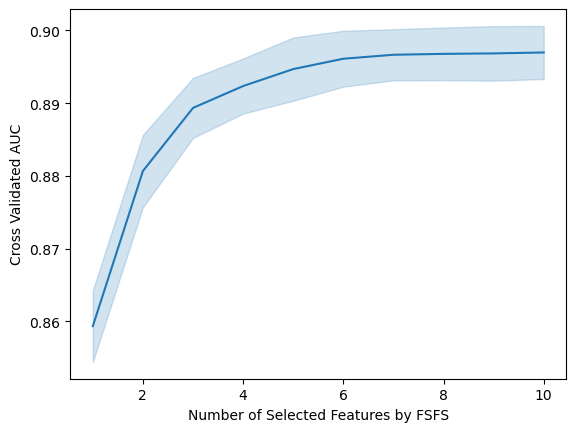

In [66]:
cv_df = pd.DataFrame({"n":n_selected, "cv":cv_scores})

ax = sns.lineplot(data=cv_df, x="n", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='Number of Selected Features by FSFS', ylabel='Cross Validated AUC')

We can say with a degree of certainty that the 6 best features are enough to limit overfitting.

In [67]:
log_best_features = selected_feature_combinations[5]
log_best_features # NB: there is ExitRates

array(['Administrative', 'Mar', 'May', 'Nov', 'PageValues',
       'ProductRelated'], dtype=object)

### Penalized Logistic Regression

`LogisticRegression` can use a penalization term that penalizes models with a higher number of parameters, meaning with a higher number of features. In this case, `C` is the hyperparameter that penalizes so it shall be tuned.

It makes little sense to use both penalization terms and features selection algorithms, thus the whole scaled training dataset waas used, without any feature selection being done.

In [68]:
# tuning  hyperparamteer C
from sklearn.linear_model import LogisticRegression

Cs = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
C_col = []
cv_scores = []

time_start = time.perf_counter()

for C in Cs:
    # linear model
    model = LogisticRegression(penalty="l1",
                               C=C,             # hyperparameter to tune
                               fit_intercept=True,
                               solver="saga",
                               max_iter=2000)
    scores = cross_val_score(model, 
                             X_scaled,          # penalization might require scaled data
                             y.ravel(),
                             scoring="roc_auc", # AUC scoring function
                             cv=10)             # 10-fold cross-validation
    C_col += [C for _ in range(10)]
    cv_scores += list(scores)
    
time_elapsed = (time.perf_counter() - time_start)

In [69]:
time_elapsed/60

0.8272478640666425

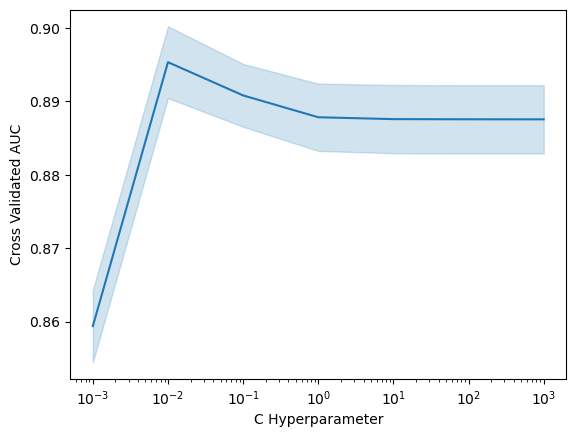

In [70]:
tuning_df = pd.DataFrame({"C":C_col, "cv":cv_scores})

ax = sns.lineplot(data=tuning_df, x="C", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='C Hyperparameter', ylabel='Cross Validated AUC')
plt.xscale('log')

It looks like `0.01` is our best choice in tuning the C hyperparameter.

### Linear Discriminant Analysis

Sadly, with the last `sklearn` update, `LinearDiscriminantAnalysis` might raise `ValueError`. For now we circumvented the problem by changing the solver parameter.

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

time_start = time.perf_counter()

selected_feature_combinations = []

for n in range(1, 11):                                  # number of features to select from 1 to 10
    # linear model
    model = LinearDiscriminantAnalysis(solver="lsqr")
    
    # Forward Stepwise Feature Selection
    fsfs = SequentialFeatureSelector(model,
                                     n_features_to_select=n,
                                     direction="forward",
                                     scoring="roc_auc", # AUC scoring function
                                     cv=10)             # 10-fold cross-validation
    fsfs.fit(X_scaled, y.ravel())
    
    # saving all features combinations selected by FSFS
    selected_feature_combinations.append(fsfs.get_feature_names_out())

time_elapsed = (time.perf_counter() - time_start)

In [72]:
time_elapsed/60

4.848858021000039

In [73]:
#selected_feature_combinations = [np.array(['PageValues'], dtype=object),
#                                 np.array(['Nov', 'PageValues'], dtype=object),
#                                 np.array(['ExitRates', 'Nov', 'PageValues'], dtype=object),
#                                 np.array(['ExitRates', 'May', 'Nov', 'PageValues'], dtype=object),
#                                 np.array(['ExitRates', 'Mar', 'May', 'Nov', 'PageValues'], dtype=object),
#                                 np.array(['ExitRates', 'Feb', 'Mar', 'May', 'Nov', 'PageValues'], dtype=object),
#                                 np.array(['ExitRates', 'Feb', 'Mar', 'May', 'Nov', 'PageValues', 'Sep'], dtype=object),
#                                 np.array(['ExitRates', 'Feb', 'Mar', 'May', 'Nov', 'PageValues', 'Sep', 'TrafficType13'], dtype=object),
#                                 np.array(['ExitRates', 'Feb', 'Jul', 'Mar', 'May', 'Nov', 'PageValues', 'Sep', 'TrafficType13'],
#                                          dtype=object),
#                                 np.array(['ExitRates', 'Feb', 'Jul', 'Mar', 'May', 'Nov', 'OS4', 'PageValues', 'Sep', 'TrafficType13'],
#                                          dtype=object)]

In [74]:
# validating feature selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_selected = []
cv_scores = []

for feature_vector in selected_feature_combinations:
    # linear model
    model = LinearDiscriminantAnalysis(solver="lsqr")
    scores = cross_val_score(model, 
                             X_scaled[ feature_vector ], 
                             y.ravel(),
                             scoring="roc_auc", # AUC scoring function
                             cv=10)             # 10-fold cross-validation
    n_selected += [len(feature_vector) for _ in range(10)]
    cv_scores += list(scores)

[Text(0.5, 0, 'Number of Selected Features by FSFS'),
 Text(0, 0.5, 'Cross Validated AUC')]

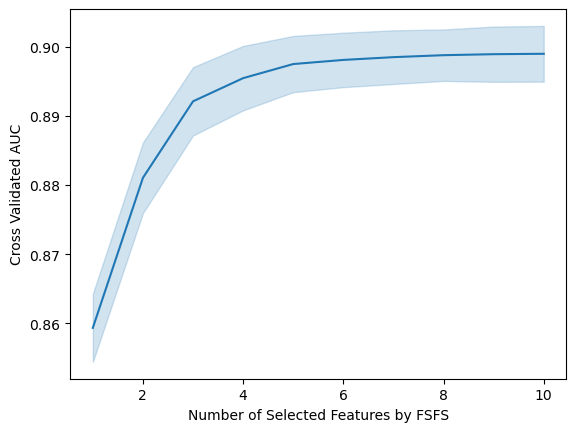

In [75]:
cv_df = pd.DataFrame({"n":n_selected, "cv":cv_scores})

ax = sns.lineplot(data=cv_df, x="n", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='Number of Selected Features by FSFS', ylabel='Cross Validated AUC')

We can say with a degree of certainty that the 4 best features are enough to limit overfitting.

In [76]:
lda_best_features = selected_feature_combinations[3]
lda_best_features  # Selected best features by LDA

array(['ExitRates', 'May', 'Nov', 'PageValues'], dtype=object)

### Perceptron

In [77]:
from sklearn.linear_model import Perceptron

time_start = time.perf_counter()

selected_feature_combinations = []
for n in range(1, 11):                      # number of features to select from 1 to 10
    # linear model
    model = Perceptron(penalty=None, 
                       fit_intercept=True, 
                       max_iter=1000)
    
    # Forward Stepwise Feature Selection
    fsfs = SequentialFeatureSelector(model,
                                     n_features_to_select=n,
                                     direction="forward",
                                     scoring="roc_auc", # AUC scoring function
                                     cv=10)             # 10-fold cross-validation
    fsfs.fit(X_scaled, y.ravel())
    
    # saving all feature combinations selected by FSFS
    selected_feature_combinations.append(fsfs.get_feature_names_out())
    
time_elapsed = (time.perf_counter() - time_start)

In [78]:
time_elapsed/60

6.291451259733367

In [79]:
#selected_feature_combinations = [np.array(['PageValKNeighborsClassifierues'], dtype=object),
#                                 np.array(['Feb', 'PageValues'], dtype=object),
#                                 np.array(['Browser6', 'Feb', 'PageValues'], dtype=object),
#                                 np.array(['Browser3', 'Browser6', 'Feb', 'PageValues'], dtype=object),
#                                 np.array(['Browser3', 'Browser6', 'Browser8', 'Feb', 'PageValues'], dtype=object),
#                                 np.array(['Browser3', 'Browser6', 'Browser8', 'Feb', 'Nov', 'PageValues'], dtype=object),
#                                 np.array(['Browser3', 'Browser6', 'Browser8', 'Feb', 'Nov', 'PageValues', 'Region3'], dtype=object),
#                                 np.array(['Browser3', 'Browser6', 'Browser8', 'Feb', 'Nov', 'PageValues', 'Region3', 'TrafficType5'],
#                                          dtype=object),
#                                 np.array(['Browser3', 'Browser6', 'Browser8', 'Feb', 'Nov', 'PageValues', 'Region3', 'TrafficType3',
#                                           'TrafficType5'], dtype=object),
#                                 np.array(['Browser3', 'Browser6', 'Browser8', 'Feb', 'Nov', 'OS3', 'PageValues', 'Region3', 'TrafficType3',
#                                           'TrafficType5'], dtype=object)]

In [80]:
# validating feature selection
from sklearn.linear_model import Perceptron

n_selected = []
cv_scores = []

for feature_vector in selected_feature_combinations:
    # linear model
    model = Perceptron(penalty=None,
                       fit_intercept=True, 
                       max_iter=2000)
    scores = cross_val_score(model,
                             X_scaled[feature_vector],
                             y.ravel(),
                             scoring="roc_auc", # AUC scoring function
                             cv=10)             # 10-fold cross-validation
    n_selected += [len(feature_vector) for _ in range(10)]
    cv_scores += list(scores)

[Text(0.5, 0, 'Number of Selected Variables by FSFS'),
 Text(0, 0.5, 'Cross Validated AUC')]

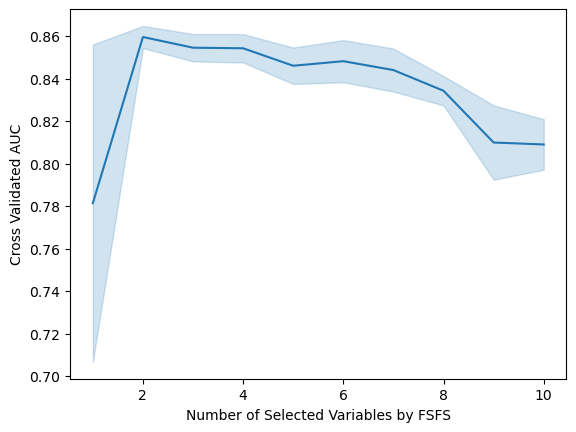

In [81]:
cv_df = pd.DataFrame({"n": n_selected, "cv": cv_scores})

ax = sns.lineplot(data=cv_df, x="n", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='Number of Selected Variables by FSFS', ylabel='Cross Validated AUC')

We can say with a degree of certainty that the 2 best features are enough to limit overfitting.

In [82]:
per_best_features = selected_feature_combinations[1]
per_best_features  # Selected best features by Perceptron

array(['Feb', 'PageValues'], dtype=object)

### Penalized Linear SVM

In [83]:
# tuning hyperparameter C
from sklearn.svm import LinearSVC

Cs = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
C_col = []
cv_scores = []

time_start = time.perf_counter()

for C in Cs:
    model = LinearSVC(fit_intercept=True,
                      penalty="l1",
                      C=C,
                      max_iter=8000,
                      dual=False)
    scores = cross_val_score(model, 
                             X_scaled, # penalization might require scaled data
                             y.ravel(),
                             scoring="roc_auc",
                             cv=10)
    C_col += [C for _ in range(10)]
    cv_scores += list(scores)
    
time_elapsed = (time.perf_counter() - time_start)

In [84]:
time_elapsed/60

3.8551401233333307

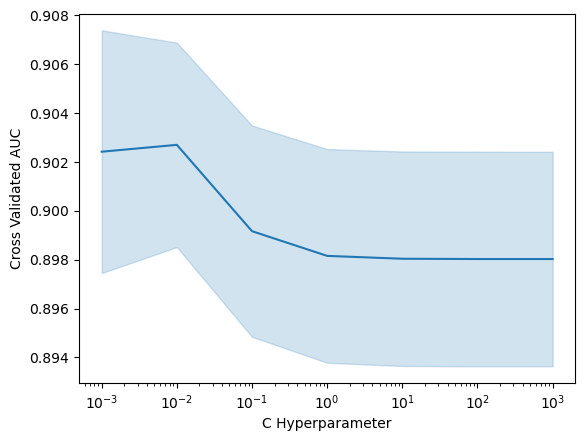

In [85]:
tuning_df = pd.DataFrame({"C":C_col, "cv":cv_scores})

ax = sns.lineplot(data=tuning_df, x="C", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='C Hyperparameter', ylabel='Cross Validated AUC')
plt.xscale('log')

It looks like `0.01` is our best choice in tuning the C hyperparameter.

### KNN Classification

This would be the only non-parametric model used in this task.

Sadly, with the last `sklearn` update, `KNeighborsClassifier` might raise `AttributeError`. For now we circumvented the problem by changing the algorithm parameter.

In [86]:
from sklearn.neighbors import KNeighborsClassifier

Ks = [1, 5, 10, 20, 30, 50, 100]
K_col = []
cv_scores = []

time_start = time.perf_counter()

for K in Ks:
    # non-parametric model
    model = KNeighborsClassifier(n_neighbors=K,
                                 algorithm="kd_tree")
    scores = cross_val_score(model, 
                             X_scaled, 
                             y.ravel(),
                             scoring="roc_auc", # AUC scoring function
                             cv=10)             # 10-fold cross-validation
    K_col += [K for _ in range(10)]
    cv_scores += list(scores)

time_elapsed = (time.perf_counter() - time_start)

In [87]:
time_elapsed/60

1.9290024943333264

[Text(0.5, 0, 'K Hyperparameter'), Text(0, 0.5, 'Cross Validated AUC')]

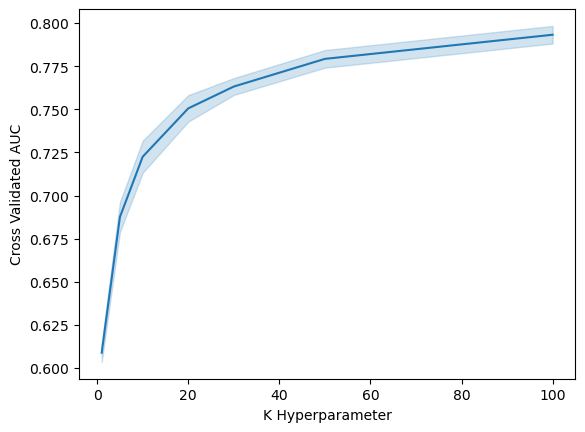

In [88]:
tuning_df = pd.DataFrame({"K":K_col, "cv":cv_scores})

ax = sns.lineplot(data=tuning_df, x="K", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='K Hyperparameter', ylabel='Cross Validated AUC')

The best range of K seems to be around 50. `K=50` is selected as K in the feature selection step.

KNN feature selection takes an insane amount of time (~40 mins) and changing the solving algorithm doesn't seem to help. Therefore we decided to cut it out of the main notebook and add only the feature selection results. The original code can still be found in the auxiliary notebook.

In [89]:
selected_feature_combinations = [np.array(['PageValues'], dtype=object),
                                 np.array(['Nov', 'PageValues'], dtype=object),
                                 np.array(['May', 'Nov', 'PageValues'], dtype=object),
                                 np.array(['Mar', 'May', 'Nov', 'PageValues'], dtype=object),
                                 np.array(['Mar', 'May', 'Nov', 'PageValues', 'Sep'], dtype=object),
                                 np.array(['Mar', 'May', 'Nov', 'PageValues', 'Sep', 'TrafficType13'], dtype=object),
                                 np.array(['Browser3', 'Mar', 'May', 'Nov', 'PageValues', 'Sep', 'TrafficType13'], dtype=object),
                                 np.array(['Browser3', 'Mar', 'May', 'Nov', 'PageValues', 'Sep', 'TrafficType13', 'TrafficType4'],
                                          dtype=object),
                                 np.array(['Browser3', 'Feb', 'Mar', 'May', 'Nov', 'PageValues', 'Sep', 'TrafficType13', 'TrafficType4'],
                                          dtype=object),
                                 np.array(['Browser3', 'Feb', 'Mar', 'May', 'Nov', 'PageValues', 'Sep', 'TrafficType1', 'TrafficType13',
                                           'TrafficType4'], dtype=object)]

In [90]:
# validating feature selection
from sklearn.neighbors import KNeighborsClassifier

n_selected = []
cv_scores = []

for feature_vector in selected_feature_combinations:
    # non-parametric model
    model = KNeighborsClassifier(n_neighbors=10,
                                 algorithm="kd_tree")
    scores = cross_val_score(model,
                             X_scaled[ feature_vector ],
                             y.ravel(),
                             scoring="roc_auc", # AUC scoring function
                             cv=10)             # 10-fold cross-validation
    n_selected += [len(feature_vector) for _ in range(10)]
    cv_scores += list(scores)

[Text(0.5, 0, 'Number of Selected Variables by FFS'),
 Text(0, 0.5, 'Cross Validated AUC')]

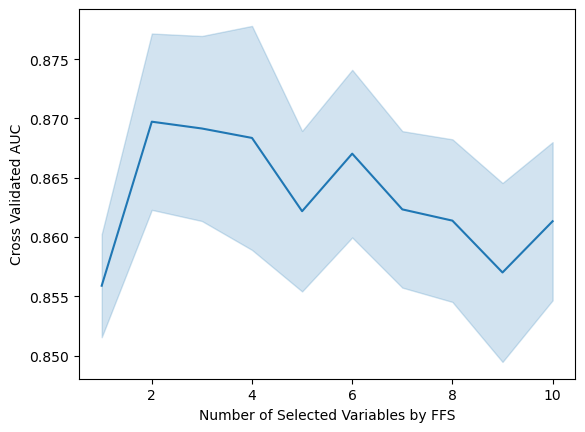

In [91]:
cv_df = pd.DataFrame({"n": n_selected, "cv": cv_scores})

ax = sns.lineplot(data=cv_df, x="n", y="cv", estimator="mean", errorbar="se")
ax.set(xlabel='Number of Selected Variables by FFS', ylabel='Cross Validated AUC')

We can say with a degree of certainty that the 2 best features are enough to limit overfitting.

In [92]:
knn_best_features = selected_feature_combinations[1]
knn_best_features  # Selected best features by KNN with K=10

array(['Nov', 'PageValues'], dtype=object)

### Comparing Models

Looking at the cross-validated accuracy there is no clear-cut "best model". We tend to prefer linear parametric models because of the potential inference we can make on parameters and features.

In order to compare the performance of all the models we have to compare different metrics. We shall focus on the AUC metric for the reason stated above, during feature selection and tuning. We shall focus on recall too, for the same reason: recall is a better alternative to accuracy in the case of unbalanced response variable.

As an auxiliary visual method of comparison, we decided to plot the ROC curves of all models too.

In [93]:
def plot_roc_curve(y_test, y_prob, label):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    curve = plt.plot(fpr, tpr, label=label)
    curve

Logistic Regression
AUC:       0.91474
Recall:    0.39286
Accuracy:  0.88896
Precision: 0.74894

Penalized Logistic Regression
AUC:       0.91183
Recall:    0.34375
Accuracy:  0.88762
Precision: 0.78974

Linear Discriminant Analysis
AUC:       0.91467
Recall:    0.33482
Accuracy:  0.88662
Precision: 0.78947

Perceptron
AUC:       0.91467
Recall:    0.48438
Accuracy:  0.89701
Precision: 0.74061

Penalized Linear SVC
AUC:       0.91467
Recall:    0.34598
Accuracy:  0.88729
Precision: 0.78283

K Nearest Neighbors
AUC:       0.86986
Recall:    0.52455
Accuracy:  0.895
Precision: 0.70149



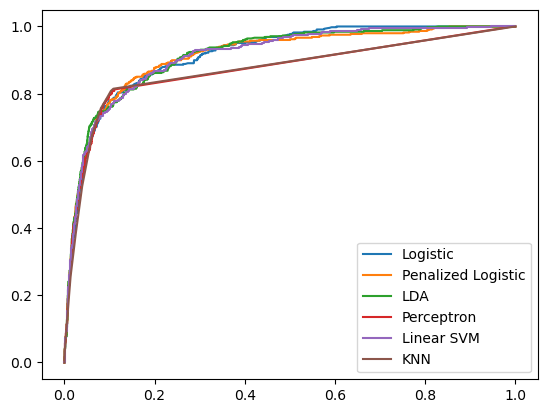

In [94]:
# Logistic Regression
log = LogisticRegression(penalty=None,
                        fit_intercept=True,
                        solver="sag")
log.fit(X_scaled[log_best_features], y.ravel())
y_pred = log.predict(X_scaled_test[log_best_features])
y_prob = log.predict_proba(X_scaled_test[log_best_features])[::,1]
print("Logistic Regression")
print("AUC:       {:.5}".format(roc_auc_score(y_test, y_prob)))
print("Recall:    {:.5}".format(recall_score(y_test, y_pred)))
print("Accuracy:  {:.5}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.5}".format(precision_score(y_test, y_pred)))
print()
plot_roc_curve(y_test, y_prob, label="Logistic")


# Penalized Logistic Regression
plog = LogisticRegression(penalty="l1",
                          C=0.01,
                          fit_intercept=True,
                          solver="saga",
                          max_iter=5000)
plog.fit(X_scaled, y.ravel())
y_pred = plog.predict(X_scaled_test)
y_prob = plog.predict_proba(X_scaled_test)[::,1]
print("Penalized Logistic Regression")
print("AUC:       {:.5}".format(roc_auc_score(y_test, y_prob)))
print("Recall:    {:.5}".format(recall_score(y_test, y_pred)))
print("Accuracy:  {:.5}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.5}".format(precision_score(y_test, y_pred)))
print()
plot_roc_curve(y_test, y_prob, label="Penalized Logistic")


# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="lsqr")
lda.fit(X_scaled[lda_best_features], y.ravel())
y_pred = lda.predict(X_scaled_test[lda_best_features])
y_prob = lda.predict_proba(X_scaled_test[lda_best_features])[::,1]
print("Linear Discriminant Analysis")
print("AUC:       {:.5}".format(roc_auc_score(y_test, y_prob)))
print("Recall:    {:.5}".format(recall_score(y_test, y_pred)))
print("Accuracy:  {:.5}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.5}".format(precision_score(y_test, y_pred)))
print()
plot_roc_curve(y_test, y_prob, label="LDA")


# Perceptron
per = Perceptron(penalty=None, 
      fit_intercept=True, 
      max_iter=2000)
per.fit(X_scaled[per_best_features], y.ravel())
y_pred = per.predict(X_scaled_test[per_best_features])
y_dist = per.decision_function(X_scaled_test[per_best_features])
print("Perceptron")
print("AUC:       {:.5}".format(roc_auc_score(y_test, y_prob)))
print("Recall:    {:.5}".format(recall_score(y_test, y_pred)))
print("Accuracy:  {:.5}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.5}".format(precision_score(y_test, y_pred)))
print()
plot_roc_curve(y_test, y_dist, label="Perceptron")


# Linear SVM
svc = LinearSVC(fit_intercept=True,
                penalty="l1",
                C=0.1,
                max_iter=5000,
                dual=False)
svc.fit(X_scaled, y.ravel())
y_pred = svc.predict(X_scaled_test)
y_dist = svc.decision_function(X_scaled_test)
print("Penalized Linear SVC")
print("AUC:       {:.5}".format(roc_auc_score(y_test, y_prob)))
print("Recall:    {:.5}".format(recall_score(y_test, y_pred)))
print("Accuracy:  {:.5}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.5}".format(precision_score(y_test, y_pred)))
print()
plot_roc_curve(y_test, y_dist, label="Linear SVM")


# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10,
                           algorithm="kd_tree")
knn.fit(X_scaled[knn_best_features], y.ravel())
y_pred = knn.predict(X_scaled_test[knn_best_features])
y_prob = knn.predict_proba(X_scaled_test[knn_best_features])[::,1]
print("K Nearest Neighbors")
print("AUC:       {:.5}".format(roc_auc_score(y_test, y_prob)))
print("Recall:    {:.5}".format(recall_score(y_test, y_pred)))
print("Accuracy:  {:.5}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.5}".format(precision_score(y_test, y_pred)))
print()
plot_roc_curve(y_test, y_prob, label="KNN")


plt.legend()

In conclusion, the logistic, LDA, perceptron and SVM models are the most performing, according to AUC metrics and the ROC curve, with the logistic model having a marginally better AUC score. The logistic regression gives us the opportunity to interpret the coefficients as odds-ratios for the binary response, an intuitive interpretation. Therefore we chose the logistic model as our "best" model.

Now we can change the probability threshold in order to optimize the resulting metrics, with a special focus on recall since our response variable is unbalanced.

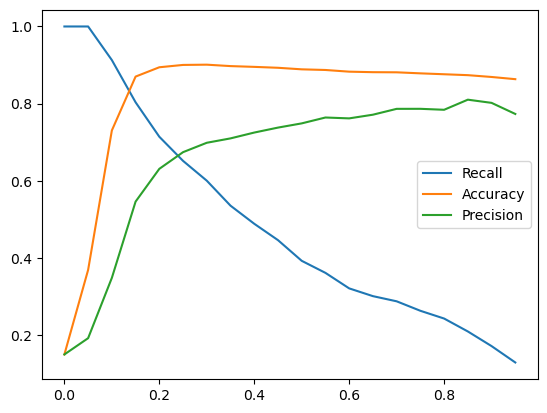

In [95]:
# re-compute probabilities
y_prob = log.predict_proba(X_scaled_test[log_best_features])[::,1]

# initializing vectors of thresholds and metrics
thresholds = np.arange(0, 1, 0.05)
recalls = []
accuracies = []
precisions = []

# computing metrics for different thresholds
for threshold in thresholds:
    y_pred = np.where(y_prob > threshold, 1, 0)
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))

# plotting
plt.plot(thresholds, recalls   , label="Recall")
plt.plot(thresholds, accuracies, label="Accuracy")
plt.plot(thresholds, precisions, label="Precision")
plt.legend()

We can "zoom in" the portion of he plot where the two curves of most interest meet (recall and accuracy), thus inferring our "best" threshold.

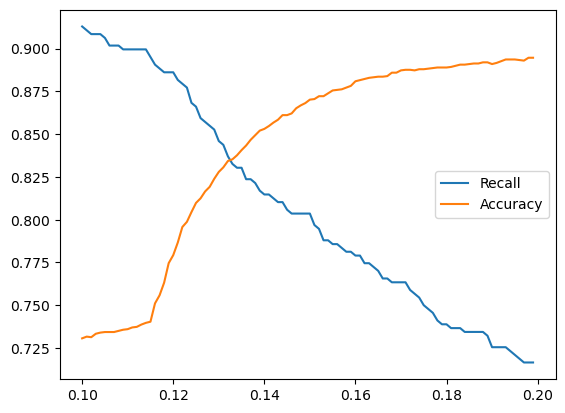

In [96]:
# initializing vectors of thresholds, accuracies and recalls
thresholds = np.arange(0.1, 0.2, 0.001)
accuracies = []
recalls = []

# computing metrics for different thresholds
for threshold in thresholds:
    y_pred = np.where(y_prob > threshold, 1, 0)
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# plotting
plt.plot(thresholds, recalls   , label="Recall")
plt.plot(thresholds, accuracies, label="Accuracy")
plt.legend()

As we can see above, the threshold that optimizes both recall and accuracy, the "best" threshold, is around `0.13` .

In [97]:
# re-computing predictions based on new threshold
y_pred = np.where(y_prob > 0.13, 1, 0)

# printing metrics in question
print("Recall:    {:.5}".format(recall_score(y_test, y_pred)))
print("Accuracy:  {:.5}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.5}".format(precision_score(y_test, y_pred)))
# jaccard index will be useful in the third task
print("Jaccard:   {:.5}".format(jaccard_score(y_test, y_pred)))

Recall:    0.84598
Accuracy:  0.82791
Precision: 0.46051
Jaccard:   0.42489


## TASK 3 - Clustering

As stated by the assignment, we have to compare the clustering models to our best classification model. We use several indexes and metrics in order to estimate performance and setting us up for comparing the clustering models with the best classification model.

### K-Means

In [98]:
from sklearn.cluster import KMeans

# clustering model
model = KMeans(n_clusters=2,
               n_init="auto",
               random_state=42)
y_pred = model.fit_predict(X)
y_test_pred = model.predict(X_test)

print("K-Means Clustering")
# internal index
print("Silhouette in Training:    {:.5}".format(silhouette_score(X, y_pred)))
print("Silhouette in Testing:     {:.5}".format(silhouette_score(X_test, y_test_pred)))
# external index
print("Jaccard Index in Training: {:.5}".format(jaccard_score(y, y_pred)))
print("Jaccard Index in Testing:  {:.5}".format(jaccard_score(y_test, y_test_pred)))
print("Mutual Information in Training: {:.5}".format(normalized_mutual_info_score(y.ravel(), y_pred)))
print("Mutual Information in Testing:  {:.5}".format(normalized_mutual_info_score(y_test.ravel(), y_test_pred)))
# other metrics
print("Recall in Training:     {:.5}".format(recall_score(y, y_pred)))
print("Recall in Testing:      {:.5}".format(recall_score(y_test, y_test_pred)))
print("Accuracy in Training:   {:.5}".format(accuracy_score(y, y_pred)))
print("Accuracy in Testing:    {:.5}".format(accuracy_score(y_test, y_test_pred)))

K-Means Clustering


/home/morfeo/miniconda3/envs/progr/lib/python3.10/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Silhouette in Training:    0.78793
Silhouette in Testing:     0.78394
Jaccard Index in Training: 0.087411
Jaccard Index in Testing:  0.085714
Mutual Information in Training: 0.0097156
Mutual Information in Testing:  0.0083223
Recall in Training:     0.11309
Recall in Testing:      0.11384
Accuracy in Training:   0.8151
Accuracy in Testing:    0.81751


### Hierarchical Clustering

In [99]:
from sklearn.cluster import AgglomerativeClustering

for linkage in ["ward", "complete", "average", "single"]:
    # clustering model
    model = AgglomerativeClustering(n_clusters=2,
                                    linkage=linkage) # does not have a random state, it's deterministic
    y_pred = model.fit_predict(X)
    y_test_pred = model.fit_predict(X_test)
    
    print("Hierarchical Clustering with {} Linkage".format(linkage))
    # internal index
    print("Silhouette in Training: {:.5}".format(silhouette_score(X, y_pred)))
    print("Silhouette in Testing:  {:.5}".format(silhouette_score(X_test, y_test_pred)))
    # external indexes
    print("Jaccard Index in Training: {:.5}".format(jaccard_score(y, y_pred)))
    print("Jaccard Index in Testing:  {:.5}".format(jaccard_score(y_test, y_test_pred)))
    print("Mutual Information in Training: {:.5}".format(normalized_mutual_info_score(y.ravel(), y_pred)))
    print("Mutual Information in Testing:  {:.5}".format(normalized_mutual_info_score(y_test.ravel(), y_test_pred)))
    normalized_mutual_info_score
    # other metrics
    print("Recall in Training:   {:.5}".format(recall_score(y, y_pred)))
    print("Recall in Testing:    {:.5}".format(recall_score(y_test, y_test_pred)))
    print("Accuracy in Training: {:.5}".format(accuracy_score(y, y_pred)))
    print("Accuracy in Testing:  {:.5}".format(accuracy_score(y_test, y_test_pred)))

Hierarchical Clustering with ward Linkage


/home/morfeo/miniconda3/envs/progr/lib/python3.10/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Silhouette in Training: 0.81504
Silhouette in Testing:  0.85658
Jaccard Index in Training: 0.15155
Jaccard Index in Testing:  0.14684
Mutual Information in Training: 0.0032077
Mutual Information in Testing:  0.0046785
Recall in Training:   0.93741
Recall in Testing:    0.96429
Accuracy in Training: 0.1781
Accuracy in Testing:  0.158
Hierarchical Clustering with complete Linkage


/home/morfeo/miniconda3/envs/progr/lib/python3.10/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Silhouette in Training: 0.91775
Silhouette in Testing:  0.95365
Jaccard Index in Training: 0.00070822
Jaccard Index in Testing:  0.0
Mutual Information in Training: 2.5989e-06
Mutual Information in Testing:  0.0002564
Recall in Training:   0.00071124
Recall in Testing:    0.0
Accuracy in Training: 0.84284
Accuracy in Testing:  0.84938
Hierarchical Clustering with average Linkage


/home/morfeo/miniconda3/envs/progr/lib/python3.10/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Silhouette in Training: 0.93966
Silhouette in Testing:  0.95365
Jaccard Index in Training: 0.0
Jaccard Index in Testing:  0.0
Mutual Information in Training: 8.7203e-05
Mutual Information in Testing:  0.0002564
Recall in Training:   0.0
Recall in Testing:    0.0
Accuracy in Training: 0.84328
Accuracy in Testing:  0.84938
Hierarchical Clustering with single Linkage


/home/morfeo/miniconda3/envs/progr/lib/python3.10/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Silhouette in Training: 0.93966
Silhouette in Testing:  0.95365
Jaccard Index in Training: 0.0
Jaccard Index in Testing:  0.0
Mutual Information in Training: 8.7203e-05
Mutual Information in Testing:  0.0002564
Recall in Training:   0.0
Recall in Testing:    0.0
Accuracy in Training: 0.84328
Accuracy in Testing:  0.84938


### Conclusions on Clustering

Even the most separated clusters according to silhouette (hierarchical with ward linkage) has a low Jaccard similarity index, especially compared to the best classification model (logistic regression). The only metric that makes clustering actually "better" than the classification model is the recall, but the overall performance is too low.

Furthermore, we claim that comparing a clustering algorithm to a classification model is a **bad practice** because it uses clustering algorithms as they were classification algorithms. It makes little sense to use accuracy and recall on clustering algorithm just in order to make the comparison even possible. An alternative: the clustering models could have been used to generate a new categorical variable (with K levels) that would have been object of study in the online marketing sector.

Without trying to compare clustering and classification, the Jaccard similarity index is a good way to externally validate the clustering models (we used mutual information too) based on the known ground truth that online shoppers will or won't generate revenue for the company in question. Still, the results of the external indexes were not good enough.